#### Verificando a quantidade de Pontes no Grafo do Brasil

In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

Alunos: Eduardo, Vitor, Daniel e Ricardo.

MIA: Análise de Dados em Grafos - PG-0083-23-X501

Nro. de Pontes NetworkX: [('PR', 'SC'), ('SC', 'RS'), ('GO', 'DF'), ('PA', 'AP')]
Nro. de Pontes Manual: 4 [('PR', 'SC'), ('SC', 'RS'), ('GO', 'DF'), ('PA', 'AP')]


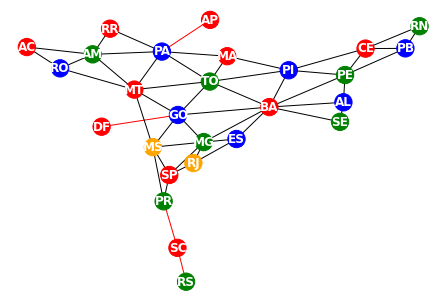

In [2]:
# Networkx possui funções greedy_color que implementa o preenchimento de cor dos vértices do 
# grafo utiliznado uma lógica Gulosa previamente escolhida ou passando uma função criada.

# Cria a função para colorir os vertices conforme descrito nos Tutoriais da Networkx
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.coloring.greedy_color.html#networkx.algorithms.coloring.greedy_color
def pintavertices(G):
    # Definicao de variaveis
    colorpalette = {0:'red', 1:"green", 2:"blue", 3:"orange", 4:"pink", 5:"yellow"}
    mapadecor = []

    # Chama a função greedy_color passando a Estratégia "largest_First" que segundo a documentação implementa
    # um preenchimento de cor gulosa, baseado no grau de cada vértice em ordem descrescente de grau
    g_color = nx.coloring.greedy_color(G, strategy="largest_first")
    
    #Exibe o Nro. Cromático para aferição
    chromaticnumber = max(g_color.values())+1
    ##print("Nro. Mínimo de Cores:", chromaticnumber)
    
    # Preenchimento das cortes de cada vértice, precisamos criar um laço para facilitar o preenchimento
    for node in G:
        mapadecor.append(colorpalette[g_color[node]])
    return mapadecor


#Pesquisa DFS por Pontes
def dfspones(G):
    #Armazena a quantidade de pontes ao percorrer o grafo
    pontes = []    
    #Armazena as cores das aretas ao percorrer o grafo, alterando quando localizar a ponte
    carestas = nx.get_edge_attributes(G,'color').values()
    
    #Percorre o grafo
    for edge in E:
        #Remove aresta para verificar se ela desconecta o Grafo, se continuar conectado não é Ponte
        G.remove_edge(edge[0],edge[1])
        if nx.is_connected(G):
            #Como não é Ponte não muda cor
            G.add_edge(edge[0],edge[1],color='black')
        else:
            #como desconectou o grafo, conta e armazena na variavel a lista de arestas
            pontes.append(edge)
            #Adiciona a aresta com a cor vermelha
            G.add_edge(edge[0],edge[1],color='red')
    
    #Paleta de cores final do Grafo
    carestas = nx.get_edge_attributes(G,'color').values()
    
    # Mostra o grafo colorido com o mínimo de Nós colorido
    mapadecor=pintavertices(G)
    # Pinta o Grafo com o mínimo de Nós e Arestas Coloridas
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color=mapadecor, edge_color=carestas)
    
    
    #Mostra quais pontes no Grafo do Brasil pela função
    print("Nro. de Pontes Manual:", len(pontes), list(pontes))

    
# Criação do Grafo
G = nx.Graph()

# Criação de todos os vértices.
V = ["CE", "RN", "PB", "PE","AL", "SE", "BA", "PI", "MA", "ES", "RJ", "MG", "SP","PR", "SC", "RS", "TO", "GO", "DF", "MS",
     "MT", "PA", "AP", "RR","AM", "AC", "RO"]
# Criação de toas as arestas, com apoio de outros colegas que já haviam desenhando os vértices.
E = [("CE", "PI"), ("CE","RN"), ("CE", "PB"), ("CE", "PE"), ("RN", "PB"), ("PB", "PE"), ("PE", "AL"), ("PE","PI"), ("AL", "SE"),
     ("SE", "BA"), ("BA", "ES"), ("BA","MG"), ("BA", "GO"), ("BA", "TO"), ("BA", "PI"), ("ES", "RJ"), ("ES", "MG"), ("RJ","MG"),
     ("RJ", "SP"), ("MG", "SP"), ("MG", "GO"), ("MG", "MS"), ("SP", "PR"), ("SP","MS"), ("PR", "SC"), ("PR", "MS"), ("SC", "RS"),
     ("MS", "GO"), ("MS", "MT"), ("GO", "MT"), ("GO", "DF"), ("GO", "TO"), ("MT","RO"), ("MT", "TO"), ("MT", "PA"), ("MT", "AM"),
     ("TO", "MA"), ("TO", "PI"), ("TO", "PA"), ("MA", "PI"), ("MA", "PA"), ("PA","AP"), ("PA", "RR"), ("PA", "AM"), ("AM", "RR"),
     ("AM", "AC"), ("AM", "RO"), ("AC", "RO"), ("PE","BA"), ("BA","AL")]
# Adicionando os vérticees ao grafo.
G.add_nodes_from(V)
# Adicionando as Arestas ao Grafo
G.add_edges_from(E)

#Mostra quais pontes no Grafo do Brasil com Networkx
print("Nro. de Pontes NetworkX:", list(nx.bridges(G)))

#DFS de Pontes
dfspones(G)
